# **Tarea 2**
## Machine Learning
### Omar Guerra - Estudiante de Ingeniería. Civil Matemática
#### Universidad de Valparaíso



---



Remarcamos que este código está basado en la implementación vista en clases, diseñado por el Profesor Alejandro Pereira, para los primeros modelos: regresión logística y svm.
Naïve Bayes, LDA y QDA fueron obtenidos desde la web.
Esta tarea se realizó en conjunto con Kathryn Barraza.

# **Objetivos**
### Comparar regresión logística, SVM, Naive Bayes, LDA y QDA.
### Usando las métricas de desempeño correspondientes.
### Exponer comentarios y análisis.

In [ ]:
#Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
import sklearn.metrics as sk_metrics 
# log_loss, roc_auc_score, recall_score, precision_score, 
# average_precision_score, f1_score, classification_report, 
# accuracy_score, roc_curve, precision_recall_curve, confusion_matrix
from scipy.special import expit

from sklearn.preprocessing import StandardScaler

In [ ]:
#Importamos los datos
from google.colab import drive
drive.mount('/content/drive')
url='/content/drive/MyDrive/data.csv'
df= pd.read_csv(url)

Mounted at /content/drive


In [ ]:
#Mostramos los primeros datos de todo nuestro conjunto 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [ ]:
#Aquí arreglamos ciertas cosas con respecto a la data: renombramos, borramos lo que tiene datos perdidos y vemos al final con cuantos datos nos quedamos.
df.rename(columns = {'num       ': 'attack'}, inplace = True)
df.replace("?", np.nan, inplace = True)
df.drop(columns = ['slope', 'ca', 'thal'], inplace = True)
df.dropna(inplace= True)
df.shape 

(261, 11)

### Variables que vamos a usar

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    – 1: typical angina
    – 2: atypical angina
    – 3: non-anginal pain
    – 4: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholesterol in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    – 0: normal
    – 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    – 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest

## Test - Train split

Separamos nuestra muestra en datos de entrenamiento y datos de test. Tomamos la separación para los cinco modelos con el mismo tamaño de test 0.3 y semilla 125. Esto es para guardar consistencia entre modelos

In [ ]:
random_seed = 125
df_train, df_test = train_test_split(df, test_size=0.3, random_state=random_seed, stratify=df['attack'])


print(df_train.shape) #tamaño de nuestros datos de entrenamiento
print(df_test.shape) #tamaño de nuestros datos de test

print("\nPercentages of heart attacks in Train data:\n", df_train['attack'].value_counts(normalize=True))
print("\nPercentages of heart attacks in Test data:\n", df_test['attack'].value_counts(normalize=True))

(182, 11)
(79, 11)

Percentages of heart attacks in Train data:
 0    0.626374
1    0.373626
Name: attack, dtype: float64

Percentages of heart attacks in Test data:
 0    0.620253
1    0.379747
Name: attack, dtype: float64


In [ ]:
#Separamos a las variables en dos grupos, numericas y categoricas
#Estandarización de variables numéricas para trabajar con el modelo de Regresión logística
## pues al intentar hacerlo sin reescalamiento había un aviso de problemas de convergencia, por lo que mejor estandarizamos en este caso

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'attack'})
cat_cols.sort()

print("Numerical var:", numeric_cols)
print("\nCategorical var:", cat_cols)

scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['attack']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

Numerical var: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical var: ['cp', 'exang', 'fbs', 'restecg', 'sex']


# **Regresión Logística** 
La regresión logística es un modelo de regresión supervisado para predecir el valor de uno de esos factores basándose en el otro. Este se basa en encontrar las relaciones entre dos factores de datos.
---



In [ ]:
log = LogisticRegression()

log.fit(X, y)

LogisticRegression()

In [ ]:
#Evaluamos el modelo

In [ ]:
X_test_log, y_test_log = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

In [ ]:
y_score_log = log.decision_function(X_test_log)

Text(0.5, 1.0, 'Curva ROC Logistic Regression')

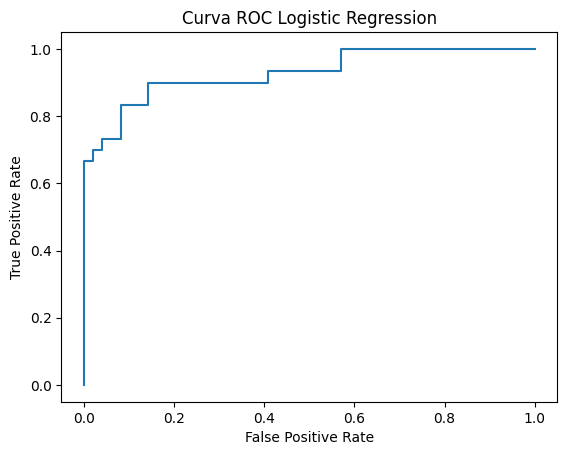

In [ ]:
fpr_log, tpr_log, _ = sk_metrics.roc_curve(y_test_log, y_score_log, pos_label= log.classes_[1])
roc_display_log = sk_metrics.RocCurveDisplay(fpr= fpr_log, tpr= tpr_log).plot()
plt.title('Curva ROC Logistic Regression')

Text(0.5, 1.0, 'Curva ROC contrastada con Random Guessing')

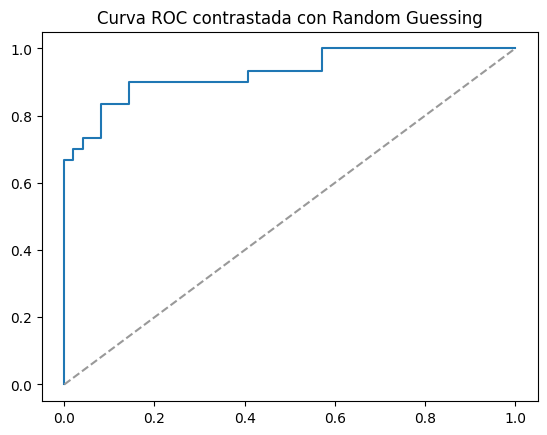

In [ ]:
roc_auc_log = sk_metrics.auc(fpr_log,tpr_log)
plt.plot(fpr_log, tpr_log, label="ROC fold (area=%0.2f)"%(roc_auc_log))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Curva ROC contrastada con Random Guessing')

Es claro que nuestro modelo de regresión ajusta mucho mejor que la curva segmantada gris, la cual es análoga al lanzar una moneda equilibrada.

Nuestro modelo se ajusta más al 1, por ende nos inclinamos en el en vez del random guessing.

In [ ]:
roc_auc_log

0.9285714285714286

El valor del AUC, carga un procentaje de 0.93%.

Sabemos que el AUC indica que tan bueno es nuestro modelo en función de cuanto más cerca esté del 1.

El modelo de regresión puede considerarse bueno en base a este AUC.

# **SVM**
El modelo SVM se puede definir como un conjunto de algoritmos de aprendizaje supervisado. Por ejemplo, dado un conjunto de muestras de entrenamiento, podemos etiquetar las clases y entrenar con ellas un modelo SVM, que nos servirá para predecir la clase de una nueva muestra.

---



In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
y = df["attack"]
X = df.drop('attack',axis=1)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.20, random_state = 123, stratify=df['attack'])

In [ ]:
svc =  svm.SVC(kernel='linear', C=1)
svc.fit(X_train_svm, y_train_svm)

svc_predicted = svc.predict(X_test_svm)

svc_conf_matrix = sk_metrics.confusion_matrix(y_test_svm, svc_predicted)
svc_acc_score = sk_metrics.accuracy_score(y_test_svm, svc_predicted)

print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:", svc_acc_score*100,'\n')
print(sk_metrics.classification_report(y_test_svm, svc_predicted))



confussion matrix
[[28  5]
 [ 6 14]]


Accuracy of Support Vector Classifier: 79.24528301886792 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.74      0.70      0.72        20

    accuracy                           0.79        53
   macro avg       0.78      0.77      0.78        53
weighted avg       0.79      0.79      0.79        53



En esta instancia pordemos ver algunos valores de métricas de desempeño como por ejemplo el F1. Donde de igual manera podemos decir que nuestro modelo está ajustando relativamente bien ya que es medianamente cercana a 1; sin contemplar gráficas aún.

In [ ]:
y_score_svm = svc.decision_function(X_test_svm.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Curva ROC SVM')

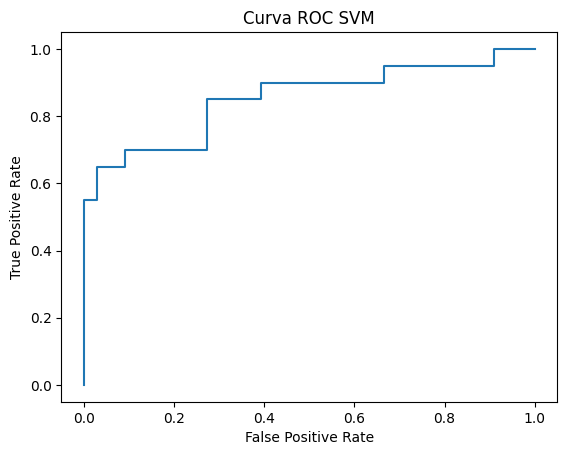

In [ ]:
fpr_svm, tpr_svm, _ = sk_metrics.roc_curve(y_test_svm, y_score_svm)
roc_display_svm = sk_metrics.RocCurveDisplay(fpr= fpr_svm, tpr= tpr_svm).plot()
plt.title('Curva ROC SVM')


Text(0.5, 1.0, 'Curva ROC SVM contrastada con Random Guessing')

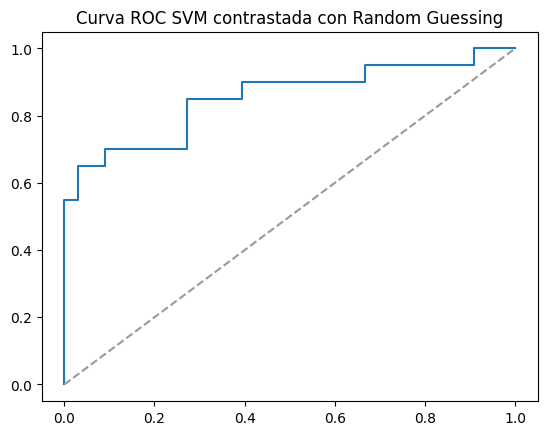

In [ ]:
roc_auc_svm=sk_metrics.auc(fpr_svm,tpr_svm)
plt.plot(fpr_svm, tpr_svm, label="ROC fold (area=%0.2f)"%(roc_auc_svm))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Curva ROC SVM contrastada con Random Guessing')



In [ ]:
roc_auc_svm

0.8530303030303031

Similarmente al modelo anterior, este está ajustando bien al 85%, pero es menor que el modelo anterior.

# **Naive Bayes**
Los modelos de Naive Bayes se basan en una técnica de clasificación estadística llamada “teorema de Bayes”. Son llamados algoritmos “Naive”, o “Inocentes” en español, pues en ellos se asume que las variables predictoras son independientes entre sí, por lo tanto proporcionan una manera fácil de construir modelos con un comportamiento muy bueno debido a su simplicidad.

---



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [ ]:
y = df["attack"]
X = df.drop('attack',axis=1)

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X, y, test_size=0.3, random_state=125
)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_nb, y_train_nb);

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_nb = gnb.fit(X_train_nb, y_train_nb).predict(X_test_nb)

accuray_nb = accuracy_score(y_pred_nb, y_test_nb)
f1_nb = f1_score(y_pred_nb, y_test_nb, average="weighted")

print("Accuracy:", accuray_nb)
print("F1 Score:", f1_nb)

Accuracy: 0.759493670886076
F1 Score: 0.754399097277308


Este modelo GNB según sus métricas de desmpeño, está ajustando al 76%, que podría seguir bueno, pero hasta ahora es el más bajo de todos.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [ ]:
y_gnb_score = gnb.predict_proba(X_test_nb)

Text(0.5, 1.0, 'Curva ROC GNB')

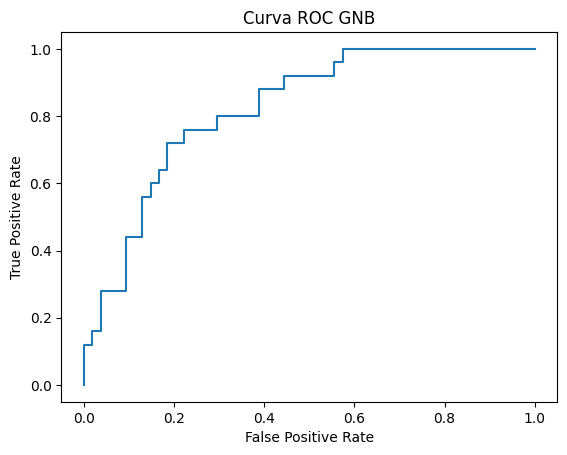

In [ ]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test_nb, y_gnb_score[:, 1])
roc_display_gnb = sk_metrics.RocCurveDisplay(fpr= fpr_gnb, tpr= tpr_gnb).plot()
plt.title('Curva ROC GNB')


Text(0.5, 1.0, 'Curva ROC GNB contrastada con Random Guessing')

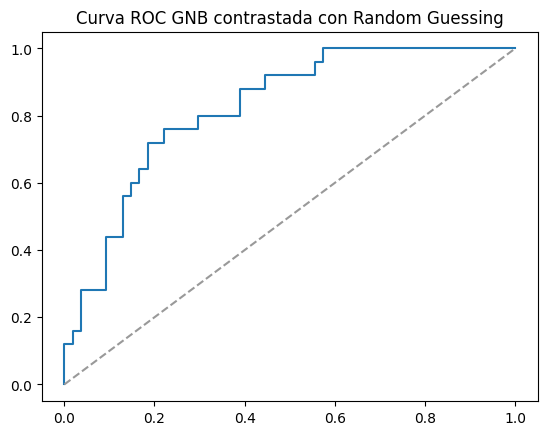

In [ ]:
roc_auc_gnb=sk_metrics.auc(fpr_gnb,tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, label="ROC fold (area=%0.2f)"%(roc_auc_gnb))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Curva ROC GNB contrastada con Random Guessing')

In [ ]:
roc_auc_gnb

0.8222222222222222

El AUC de este modelo está ajustando al 82%, lo cual se coloca sólo un poco detrás del SVM.

# **LDA**
El análisis discriminante linear (LDA) es un algoritmo de aprendizaje supervisado que se utiliza para tareas de clasificación en Machine Learning. Es una técnica utilizada para encontrar una combinación lineal de características que mejor separe las clases en un conjunto de datos.

---



In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
y = df["attack"]
X = df.drop('attack',axis=1)

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(
    X, y, test_size=0.3, random_state=125)

In [ ]:
lda = LDA()

lda.fit(X_train_lda, y_train_lda);

In [ ]:
y_lda_score = lda.predict_proba(X_test_lda)

Text(0.5, 1.0, 'Curva ROC LDA')

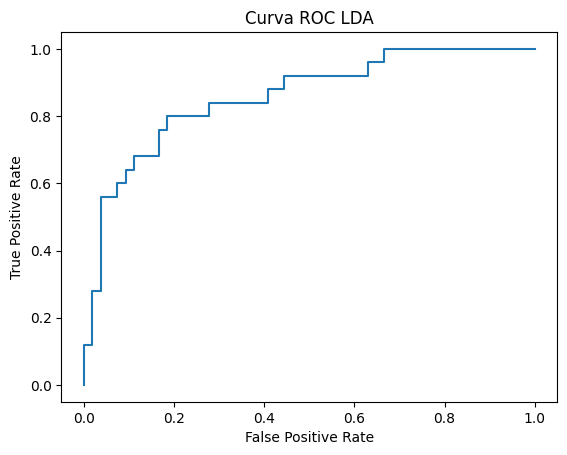

In [ ]:
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_lda, y_lda_score[:, 1])
roc_display_lda = sk_metrics.RocCurveDisplay(fpr= fpr_lda, tpr= tpr_lda).plot()
plt.title('Curva ROC LDA')

Text(0.5, 1.0, 'Curva ROC LDA constrastada con Random Guessing')

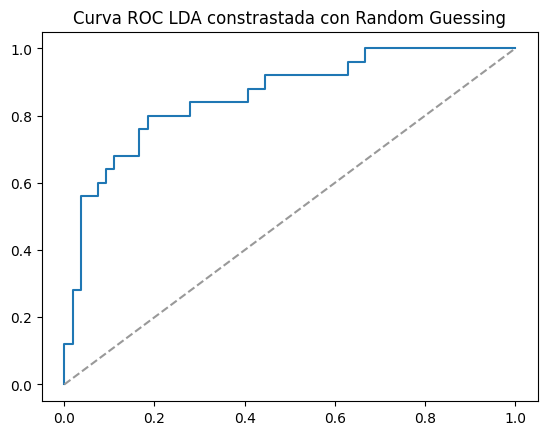

In [ ]:
roc_auc_lda =sk_metrics.auc(fpr_lda,tpr_lda)
plt.plot(fpr_lda, tpr_lda, label="ROC fold (area=%0.2f)"%(roc_auc_lda))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Curva ROC LDA constrastada con Random Guessing')

In [ ]:
roc_auc_lda

0.8577777777777778

Según el AUC de este modelo LDA se coloca al mismo nivel de buen ajuste que el SVM.

# **QDA**

---


Este método es similar al LDA y también asume que las observaciones de cada clase se distribuyen normalmente, pero no asume que cada clase comparta la misma matriz de covarianza. En cambio, QDA supone que cada clase tiene su propia matriz de covarianza.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [ ]:
y = df["attack"]
X = df.drop('attack',axis=1)

X_train_qda, X_test_qda, y_train_qda, y_test_qda = train_test_split(
    X, y, test_size=0.3, random_state=125
)

In [ ]:
qda = QDA()
qda.fit(X_train_qda, y_train_qda)

QuadraticDiscriminantAnalysis()

In [ ]:
y_score_qda = qda.predict_proba(X_test_qda)

Text(0.5, 1.0, 'Curva ROC LDA')

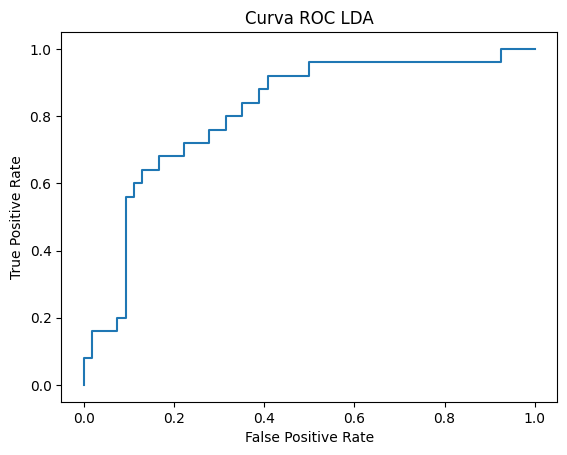

In [ ]:
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test_qda, y_score_qda[:, 1])
roc_display_qda = sk_metrics.RocCurveDisplay(fpr= fpr_qda, tpr= tpr_qda).plot()
plt.title('Curva ROC LDA')

Text(0.5, 1.0, 'Curva ROC LDA contrastada con Random Guessing')

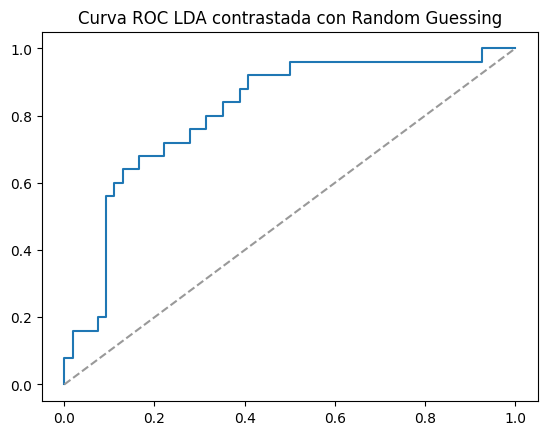

In [ ]:
roc_auc_qda = sk_metrics.auc(fpr_qda,tpr_qda)
plt.plot(fpr_qda, tpr_qda, label="ROC fold (area=%0.2f)"%(roc_auc_qda))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Curva ROC LDA contrastada con Random Guessing')

In [ ]:
roc_auc_qda

0.8103703703703703

Notamos que el AUC de este modelo está ajustando al 81%, lo cual lo coloca detrás del GNB

# **Análisis**

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_log = log.fit(X, y).predict(X_test_log)
y_pred_svm = svc.fit(X_train_svm, y_train_svm).predict(X_test_svm)
y_pred_nb = gnb.fit(X_train_nb, y_train_nb).predict(X_test_nb)
y_pred_lda = lda.fit(X_train_lda, y_train_lda).predict(X_test_lda)
y_pred_qda = qda.fit(X_train_qda, y_train_qda).predict(X_test_qda)

accuray_log = accuracy_score(y_pred_log, y_test_log)
f1_log = f1_score(y_pred_log, y_test_log, average="weighted")
accuray_svm = accuracy_score(y_pred_svm, y_test_svm)
f1_svm = f1_score(y_pred_svm, y_test_svm, average="weighted")
accuray_nb = accuracy_score(y_pred_nb, y_test_nb)
f1_nb = f1_score(y_pred_nb, y_test_nb, average="weighted")
accuray_lda = accuracy_score(y_pred_lda, y_test_lda)
f1_lda = f1_score(y_pred_lda, y_test_lda, average="weighted")
accuray_qda = accuracy_score(y_pred_qda, y_test_qda)
f1_qda = f1_score(y_pred_qda, y_test_qda, average="weighted")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Para realizar una comparación más sencilla a la vista, realizamos una tabla donde resumiremos las medidas de desmepeño de los modelos.

In [ ]:
# Tabla de comparaciones 

desem = [ ["LG", roc_auc_log, accuray_log, f1_log],
     ["SVM", roc_auc_svm, accuray_svm, f1_svm],
     ["GNB", roc_auc_gnb, accuray_nb, f1_nb],
     ["LDA", roc_auc_lda, accuray_lda, f1_lda],
     ["QDA", roc_auc_qda, accuray_qda, f1_qda]]
     
print ("{:<8} {:<10}   {:<20}  {:<30}".format('Modelo','AUC','        Accuracy','        F1'))

for v in desem:
    Modelo, AUC, Accuracy, F1= v
    print ("{:<8} {:<10}   {:<20}  {:<30}".format( Modelo, AUC, Accuracy, F1))

Modelo   AUC                  Accuracy              F1                    
LG       0.9285714285714286   0.7088607594936709    0.7054894200667985            
SVM      0.8530303030303031   0.7924528301886793    0.7935648318639026            
GNB      0.8222222222222222   0.759493670886076     0.754399097277308             
LDA      0.8577777777777778   0.7974683544303798    0.7974683544303798            
QDA      0.8103703703703703   0.759493670886076     0.754399097277308             


Si nos basamos en AUC nuestros modelos ordenados de mejor a peor son: LG, LDA, SVM, GNB y QDA.

Si nos basamos en Accuracy el orden es: LDA, SVM, QDA, GNB y LG.

Si nos basamos en F1 los ordenes serán: LDA, SVM, QDA, GNB y LG.

Es preciso notar que dado el tamaño del test_train y según la semilla que escojamos, nuestras métricas de desempeño pueden variar e indicar que no necesariamente se preserve el orden de los mejores modelos.

Además para finalizar debemos remarcar que no es correcto preferir una métrica de desempeño sobre otra, sólo son ilustrativas entre sí, i.e no hacen alusión a decir que una métrica es mejor que otra para decidir en cuál de ellas basarse para la elección de nuestro modelo.